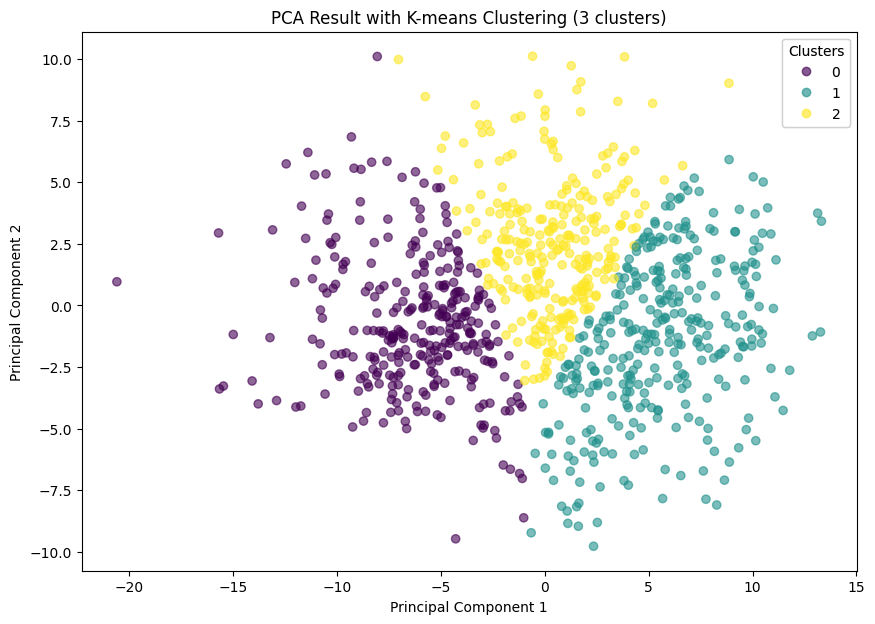

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import init

# Load the new CSV file
file = init.RESULTS_OUT_DIR + '/rearranged.csv'
data = pd.read_csv(file)

# Filter out 'FileName' and columns containing 'Count' in their headers
filtered_data = data.loc[:, ~data.columns.str.contains('Count|FileName')]

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Perform K-means clustering with 4 clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Add the cluster labels to the PCA result dataframe
pca_result_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_result_df['Cluster'] = clusters

# Plot the PCA result with cluster labels (4 clusters)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result_df['PC1'], pca_result_df['PC2'], c=pca_result_df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result with K-means Clustering (3 clusters)')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.show()